In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [3]:
%matplotlib inline

In [4]:
shp_path = "GeoFile/tl_2017_us_state.shp"
sf = shp.Reader(shp_path)

In [5]:
len(sf.shapes())

56

In [6]:
#Searching an index 
sf.records()[1]

Record #1: ['3', '5', '12', '00294478', '12', 'FL', 'Florida', '00', 'G4000', 'A', 138911437206, 31398800291, '+28.4574302', '-082.4091478']

In [7]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [8]:
df = read_shapefile(sf)
df.shape

(56, 15)

In [9]:
df.sample(5)

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,coords
41,9,0,60,01802701,60,AS,American Samoa,00,G4000,A,197759070,1307243753,-14.2668475,-170.6671854,"[(-171.14118100000002, -11.046607999999999), (..."
25,3,7,48,01779801,48,TX,Texas,00,G4000,A,676641930188,19017521093,+31.4347032,-099.2818238,"[(-103.98017899999999, 32.000125), (-103.97993..."
29,3,6,47,01325873,47,TN,Tennessee,00,G4000,A,106798015774,2354836197,+35.8585557,-086.3493580,"[(-82.222064, 36.15696), (-82.222145, 36.15692..."
32,2,4,38,01779797,38,ND,North Dakota,00,G4000,A,178710423375,4400396641,+47.4421740,-100.4608258,"[(-104.045371, 47.330127999999995), (-104.0453..."
24,2,3,39,01085497,39,OH,Ohio,00,G4000,A,105833282399,10264451012,+40.4149297,-082.7119975,"[(-84.803251, 40.989394), (-84.803242, 40.9910..."


In [10]:
df[df.NAME=='Massachusetts']

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,coords
51,1,1,25,00606926,25,MA,Massachusetts,00,G4000,A,20204287539,7130763257,+42.1565196,-071.4895915,"[(-71.49825899999999, 42.017272), (-71.499065,..."


In [11]:
y_lim = (23, 50) # latitude 
x_lim = (-128, -65) # longitude
plot_map(sf, x_lim, y_lim)

NameError: name 'plot_map' is not defined

In [12]:
def plot_map_fill_multiples_ids(title, comuna, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<Figure size 1080x648 with 0 Axes>

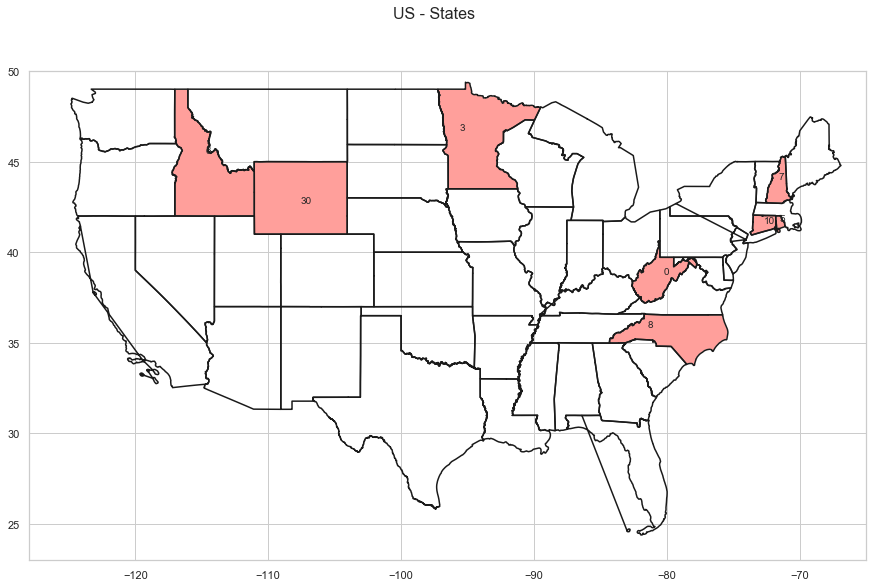

In [39]:
state_id = [0, 10, "MI", 5, 6, 7, 8, 30]
plot_map_fill_multiples_ids("US - States", state_id, sf, x_lim, 
                             y_lim, color = 'r', figsize = (15,9))

In [14]:
def plot_map(sf, x_lim = (23, 50), y_lim = (-128, -65), figsize = (15,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

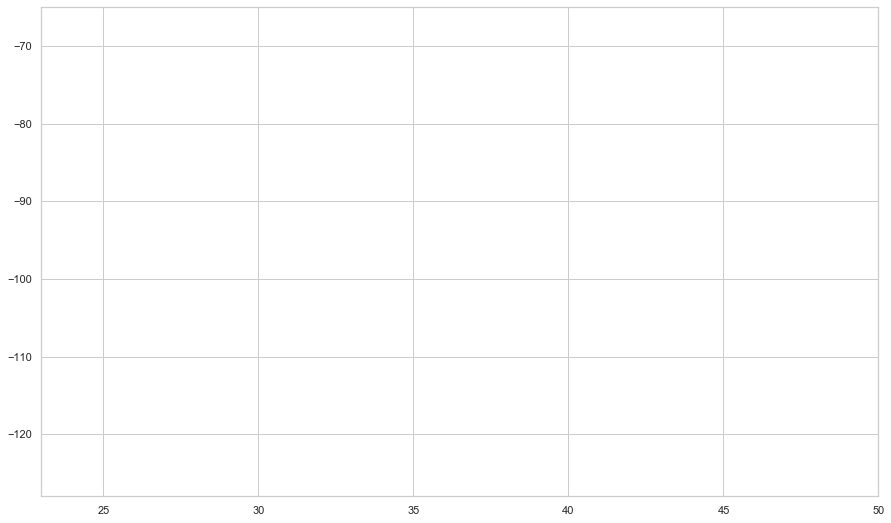

In [15]:
plot_map(sf)